![polytechnic of tehran](https://www.irangi.org/uploads/images/4_1560089256_1291127534.png)
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;"> *Python code of Spam detection in Persian*</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Professor: Dr. M.Akbari (akbari.ma@aut.ac.ir)</span></div>.     

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">
    TAs: A.Malekzade(malekzadeh@ieee.org) , Y.Ommi(yassi.ommi@gmail.com)</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Student: Mohammadreza Ardestani (ardestani.zr@gmail.com)</span></div>

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">9513004</span></div>.



Date: 5,Dec,2020


# Impoting libraries

In [1]:
import hazm
import os
import math, collections, functools, operator
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt

# 1) Preprocessing
## 1.1) Only keeping Persian words

In [2]:
class const:

    farsi = ('ب', 'س', 'ش', 'ل', 'ت', 'ن', 'م', 'گ', 'ظ', 'ط', 'ز',
             'ر', 'ژ', 'ذ', 'د', 'پ', 'چ', 'ج', 'ح', 'ع', 'خ', 'غ', 'ف', 'ق', 'ث', 'ص', 'ض', ' ', '\n')

    alef = ('ا', 'آ', 'ء', 'أ', 'إ')
    vav = ('و', 'ؤ')
    heh = ('ه', 'ة', 'ە')
    yah = ('ی', 'ي', 'ئ', 'ى')
    kaf = ('ک', 'ك')


def finder(char):
    if char in const.alef:
        return const.alef[0]
    if char in const.farsi:
        return char
    elif char in const.vav:
        return const.vav[0]
    elif char in const.heh:
        return const.heh[0]
    elif char in const.yah:
        return const.yah[0]
    elif char in const.kaf:
        return const.kaf[0]
    return ''

def normalizer(path):
    text = open(path, encoding='utf8').read()
    map_test = map(finder, text)
    result = ''.join(map_test)
    return result

def text_extract(path):
    results = []
    folder = os.path.join(os.getcwd(), path)
    files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    for f in files:
        results.append(normalizer(path + f))
    return results


In [3]:
path_hamtrain = 'emails/hamtraining/'
path_hamtest = 'emails/hamtesting/'
path_spamtrain = 'emails/spamtraining/'
path_spamtest = 'emails/spamtesting/'

text_hamtrain = text_extract(path_hamtrain)
text_hamtest = text_extract(path_hamtest)
text_spamtrain = text_extract(path_spamtrain)
text_spamtest = text_extract(path_spamtest)

## 1.2) Stemming, removing stopwords, and tokenizing

In [4]:
stemmer = hazm.Stemmer()
stopwords = hazm.word_tokenize(open('stopwords.txt', encoding='utf8').read())
# print(stopwords)
def process_text(texts):
    result = []
    for text in texts:
        processed_text = []
        tokenized_text = hazm.word_tokenize(text)
        for word in tokenized_text:
            if not (word in stopwords or len(word) < 2):
                processed_text.append(stemmer.stem(word))
        result.append(processed_text)
    return result
        


In [5]:
processed_hamtrain = process_text(text_hamtrain)
processed_hamtest = process_text(text_hamtest)
processed_spamtrain = process_text(text_spamtrain)
processed_spamtest = process_text(text_spamtest)

Sample result after preprocessing:

In [6]:
print(processed_hamtrain[1])

['سلا', 'افتخار', 'استاد', 'بزرگوار', 'جناب', 'دک', 'فرخ', 'پ', 'انتخاب', 'میکن', 'چیز', 'یاد', 'گرف', 'تو', 'هیچ', 'کتاب', 'نمیشه', 'کرد', 'اساتید', 'محتر', 'ارزو', 'طول', 'عمر', 'سلامت', 'دار']


## 1.3) vectorizing

In [7]:
def vectorizer(l):
    # list is a list of lists which each list has seperated tokens
    resultList = [] # A list of dictionaires(vectors)
    
    for txt in l:
        dic = {}
        for token in txt:
            if token in dic:
                dic[token] += 1
            else:
                dic[token] = 1 # initializing 
        resultList.append(dic) 
    return resultList

SVTrain = vectorizer(processed_spamtrain) # List of dictionaries(vectors) for Spam cat in TrainSet
HVTrain = vectorizer(processed_hamtrain) # List of dictionaries(vectors) for Ham cat in TrainSet                
SVTest = vectorizer(processed_spamtest) # List of dictionaries(vectors) for Spam cat in TestSet
HVTest = vectorizer(processed_hamtest) # List of dictionaries(vectors) for Ham cat in TestSet
print(SVTest)

[{'دوس': 2, 'عزیز': 2, 'لطفا': 1, 'خواندن': 1, 'مطالب': 1, 'ان': 1, 'امتیاز': 1, 'مثب': 1, 'منف': 1, 'بدهید': 1, 'هرگونه': 1, 'انتقاد': 1, 'پیشنهاد': 1, 'مایه': 1, 'بزرگوار': 1, 'میدون': 1, 'قسم': 1, 'نظر': 1, 'ثب': 1, 'کنید': 1, 'معروف': 1, '': 1, 'فرزند': 1, 'نامشروع': 1, 'مارادونا': 1, 'ت': 1, 'مل': 1, 'ایتالیا': 1, 'عکس': 2, 'شنبه': 4, 'د': 6, 'ازدواج': 1, 'پنهان': 1, 'بازیگر': 1, 'زن': 1, 'مشهور': 1, 'هالیوود': 1, 'روا': 1, 'مرگ': 1, 'مجر': 1, 'ورزش': 1, 'نیما': 1, 'نهاوند': 1, 'تصاویر': 1, 'پدر': 1, 'مادر': 1, 'ایران': 1, 'شکیرا': 1, 'جمل': 2, 'طنز': 1, 'فیسبوک': 2, 'جمعه': 2, 'فلسف': 1}, {'دوس': 2, 'عزیز': 2, 'لطفا': 1, 'خواندن': 1, 'مطالب': 1, 'ان': 1, 'امتیاز': 1, 'مثب': 1, 'منف': 1, 'بدهید': 1, 'هرگونه': 1, 'انتقاد': 1, 'پیشنهاد': 1, 'مایه': 1, 'بزرگوار': 1, 'میدون': 1, 'قسم': 1, 'نظر': 1, 'ثب': 1, 'کنید': 1, 'عکس': 5, 'لو': 1, 'رفته': 1, 'گلشیفته': 1, 'راد': 1, 'جمعه': 7, 'د': 7, 'تصویر': 1, 'سه': 1, 'بعد': 1, 'ویروس': 1, 'ایدز': 1, 'رنگ': 1, 'تهر': 1, 'سال': 1, 'بازیگر': 1,

Finding Category frequency of tokens

In [8]:
# Category Frequency of tokens in Spam class
CFS = dict(functools.reduce(operator.add, map(collections.Counter, SVTrain))) 
# Category Frequency of tokens in Ham class
CFH = dict(functools.reduce(operator.add, map(collections.Counter, HVTrain))) 
# Category Frequency of tokens in All categories
union = HVTrain + SVTrain 
CFA =  dict(functools.reduce(operator.add, map(collections.Counter, union )))

In [9]:
print(CFH['م'])

755


Finding document Frequency of tokens

In [10]:
lst = [] # exactly as same as SVtrain but all keys are 1 
for dic in SVTrain:
    lst.append(dict.fromkeys(dic, 1))
# Document Frequency for all tokens in Spam category
DFS = dict(functools.reduce(operator.add, map(collections.Counter, lst)))

lst = [] # exactly as same as HVTrain but all keys are 1 
for dic in HVTrain:
    lst.append(dict.fromkeys(dic, 1))
# Document Frequency for all tokens in Spam category
DFH = dict(functools.reduce(operator.add, map(collections.Counter, lst)))

# Document Frequency for all tokens in All categories
unionList = []
unionList.append(DFH)
unionList.append(DFS)
DFA = dict(functools.reduce(operator.add, map(collections.Counter, unionList )))

In [11]:
print(DFS['م'])

218


Finding extra features for feeding Naive Bayes method 

In [12]:
def sumKeys(dic):
    s=0
    for k,v in dic.items():
        s += v
    return s
def Probability_calculater(dic, Total_Num):
    temp_dic = {}
    F = len(dic) # total number of uniqe features 
    for word,frequency in dic.items():
        temp_dic[word]= 100*((frequency+1)/(Total_Num+F))
        # have been multiplied by 100 just for reaching 
    return temp_dic



# sum of all Number of Features frequencies in category Spam
NFS = sumKeys(CFS)
# sum of all Number of Features frequencies in category Ham
NFH = sumKeys(CFH) 

# Probability of features in category Spam
PFS = Probability_calculater(CFS,NFS)
# Probability of features in category Hpam
PFH = Probability_calculater(CFH,NFH)
print(PFH)

{'عباس': 0.07801971771047592, 'معروف': 0.0874766531905336, 'نمره': 0.04728467740028844, 'اندازه': 0.03546350805021633, 'مرا': 0.03073504031018748, 'ول': 0.014185403220086532, 'کن': 0.6596212497340237, 'فکر': 0.20805258056126913, 'خود': 0.2387876208714566, 'بکن': 0.021278104830129797, 'شنبه': 0.014185403220086532, 'اب': 0.08038395158049035, 'به': 0.23405915313142778, 'فرص': 0.06383431449038938, 'میده': 0.03546350805021633, 'انگار': 0.028370806440173063, 'راستگو': 0.007092701610043266, '': 1.922122136321725, 'عقیده': 0.016549637090100953, 'بوده': 0.11584745963070667, 'بوده_ا': 0.007092701610043266, 'ال': 0.15367520155093742, 'ندار': 0.09929782254060572, 'همگ': 0.01182116935007211, 'ا': 0.5343168546232594, 'دروغگو': 0.009456935480057686, 'هست': 0.06383431449038938, 'شماره': 0.06383431449038938, 'کار': 0.39009858855237955, 'بانک': 0.03073504031018748, 'مل': 0.09929782254060572, 'اس': 0.907865806085538, 'پول': 0.08038395158049035, 'برنگردان': 0.004728467740028843, 'مدارک': 0.023642338700144

### Removing all words in test set that are not in train set to help Cosinesimilarity fucntion  (so that we don't waste time in cosine similarity fucntion) 

In [13]:
def lenght(listOfDics):
    # this fucn get a list of dictionaries and calculate total number of words in all dics 
    s = 0
    for dic in listOfDics:
        s += len(dic)
    return s

def unknownRemover(testDic ,DFA):
    # we go through all dictionaries in testdic and remover unknown words 
    # notice testDic is a list of dics and DFA is a dic
    for dic in testDic:
        CFR = [] #CandidateForRemoving
        for k,v in dic.items():
            if k not in DFA:
                CFR.append(k)
        for k in CFR:
            del dic[k]

In [14]:
print("total words in SVTest and SHTest before removing unkowns",lenght(SVTest),lenght(HVTest))
unknownRemover(SVTest,DFA)
unknownRemover(HVTest,DFA)
print("total words in SVTest and SHTest after removing unkowns",lenght(SVTest),lenght(HVTest))

total words in SVTest and SHTest before removing unkowns 26033 16735
total words in SVTest and SHTest after removing unkowns 23654 14783


# 2) Selecting most influencial words

In [16]:
def ChiSquare(dic_spam, dic_ham, freq_spam, freq_ham):
    
    chi_spam = {}
    chi_ham = {}
    N = freq_spam + freq_ham
    # Spam
    for word,value in dic_spam.items():
        A = value
        C = freq_spam - A
        B = 0
        if word in dic_ham:
            B = dic_ham[word]
        D = freq_ham - B
        X = N*(A*D - C*B)/((A+C)*(B+D)*(A+B)*(C+D))
        chi_spam[word] = round(X*1000,3)
        
    # Ham
    for word,value in dic_ham.items():
        A = value
        C = freq_ham - A
        B = 0
        if word in dic_spam:
            B = dic_spam[word]
        D = freq_spam - B
        X = N*(A*D - C*B)/((A+C)*(B+D)*(A+B)*(C+D))
        chi_ham[word] = round(X*1000,3)
    
    return chi_spam, chi_ham

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def keep_influencial_words(chi, num):
    sorted_dic = dict(sorted(chi.items(), reverse = True, key=lambda item: item[1]))
    return take(num, sorted_dic.items())
        

In [17]:
chi_spam, chi_ham = ChiSquare(CFS, CFH, len(text_spamtrain), len(text_hamtrain))
important_spam_words = keep_influencial_words(chi_spam, 200)
important_ham_words = keep_influencial_words(chi_ham, 200)

Important spam words

In [18]:
print(important_spam_words)

[('پست', 23.81), ('اموز', 23.619), ('استفاده', 18.468), ('ارسال', 10.115), ('سا', 8.952), ('کلیک', 8.322), ('نر', 8.034), ('باشد', 7.99), ('افزار', 7.909), ('مو', 7.192), ('زیبا', 7.137), ('مجموعه', 6.734), ('ایمیل', 6.456), ('رو', 6.201), ('صور', 5.433), ('افزا', 5.416), ('دارا', 5.253), ('فر', 4.955), ('اموزش', 4.899), ('دکمه', 4.888), ('فرو', 4.833), ('د', 4.794), ('دستگاه', 4.789), ('منزل', 4.751), ('شده', 4.724), ('مشاهده', 4.715), ('ساع', 4.663), ('طراح', 4.65), ('العاده', 4.63), ('نمایید', 4.621), ('فوق', 4.611), ('توانید', 4.61), ('قابل', 4.575), ('شامل', 4.521), ('کالا', 4.515), ('زب', 4.484), ('هزینه', 4.44), ('همراه', 4.419), ('شود', 4.394), ('بگیرید', 4.363), ('کسب', 4.363), ('رایگ', 4.318), ('نیاز', 4.303), ('س', 4.3), ('سفار', 4.24), ('هدیه', 4.224), ('بالا', 4.183), ('شماره', 4.167), ('فروشگاه', 4.143), ('مناسب', 4.09), ('رنگ', 4.07), ('کودک', 4.066), ('سیس', 4.066), ('میباشد', 4.052), ('سپس', 4.028), ('اینترنت', 4.028), ('نظیر', 4.0), ('بسته', 3.997), ('پوس', 3.971), ('

Important ham words

In [19]:
print(important_ham_words)

[('کار', 52.14), ('قیم', 22.578), ('محصول', 10.823), ('ا', 5.409), ('کنید', 5.025), ('کن', 4.116), ('یه', 3.874), ('خرید', 3.826), ('سلا', 3.822), ('تو', 3.769), ('افغانس', 3.704), ('زبانشناس', 3.663), ('بود', 3.61), ('جناب', 3.604), ('اینجانب', 3.546), ('بگ', 3.534), ('جنابعال', 3.515), ('دادگاه', 3.509), ('واسه', 3.503), ('کنگره', 3.497), ('کنن', 3.478), ('راییل', 3.46), ('لطف', 3.454), ('نمیدون', 3.454), ('مملک', 3.448), ('ممنون', 3.446), ('فردوس', 3.442), ('نکن', 3.436), ('استحضار', 3.436), ('هستن', 3.436), ('میگ', 3.436), ('نشد', 3.431), ('استویا', 3.431), ('رسیدگ', 3.425), ('خبرنگار', 3.425), ('مگر', 3.425), ('فرامرز', 3.425), ('کرده_بود', 3.419), ('استراتیژیک', 3.419), ('میکنه', 3.419), ('حضرتعال', 3.413), ('معاون', 3.413), ('گرگ', 3.413), ('مسیولین', 3.407), ('فردا', 3.407), ('شریف', 3.407), ('میدون', 3.407), ('داشت', 3.407), ('دبیر', 3.407), ('ببخشید', 3.407), ('ارگانیک', 3.407), ('بیا', 3.401), ('موافق', 3.401), ('پارسال', 3.401), ('کمال', 3.401), ('شریعتمدار', 3.396), ('میکن

#### Finding _Document _Frequecy of features in _Spam category or _Ham category for _Selected features 
####  We will find: DFSS  & DFHS & DFAS 
#### DFAS ( _Document _Frequecy of features in _All categories for _Selected features 

In [20]:
def convertor(listOfTuples):
    # we conver a list on tuples into a dictionary
    # and then we return that dic 
    dic={}
    for tup in listOfTuples:
        dic[tup[0]]=tup[1]
    return dic 
    

In [21]:
def freqFinder(inputDic , refrenceDic):
    # we gonna replace value of keys in inputDic with coressponding value of that key in refrenceDic
    inputDic2 = inputDic # we don't change inputdic 
    for k,v in inputDic2.items():
        inputDic[k]= refrenceDic[k]
    return inputDic2

In [22]:
DFSS = freqFinder(convertor(important_spam_words) , DFS)
DFHS = freqFinder(convertor(important_ham_words) , DFH)

unionList = []
unionList.append(DFHS)
unionList.append(DFSS)
DFAS = dict(functools.reduce(operator.add, map(collections.Counter, unionList )))


In [23]:
print(len(DFAS)) 

400


In [24]:
print(DFAS) # all importatn features and their frequency in the whole train set

{'کار': 95, 'قیم': 9, 'محصول': 4, 'ا': 90, 'کنید': 51, 'کن': 131, 'یه': 61, 'خرید': 4, 'سلا': 156, 'تو': 56, 'افغانس': 1, 'زبانشناس': 32, 'بود': 83, 'جناب': 26, 'اینجانب': 15, 'بگ': 25, 'جنابعال': 15, 'دادگاه': 2, 'واسه': 16, 'کنگره': 9, 'کنن': 19, 'راییل': 4, 'لطف': 17, 'نمیدون': 16, 'مملک': 11, 'ممنون': 49, 'فردوس': 9, 'نکن': 17, 'استحضار': 15, 'هستن': 10, 'میگ': 18, 'نشد': 16, 'استویا': 3, 'رسیدگ': 7, 'خبرنگار': 4, 'مگر': 10, 'فرامرز': 14, 'کرده_بود': 13, 'استراتیژیک': 1, 'میکنه': 13, 'حضرتعال': 8, 'معاون': 5, 'گرگ': 2, 'مسیولین': 10, 'فردا': 8, 'شریف': 9, 'میدون': 11, 'داشت': 12, 'دبیر': 10, 'ببخشید': 10, 'ارگانیک': 3, 'بیا': 11, 'موافق': 10, 'پارسال': 11, 'کمال': 11, 'شریعتمدار': 2, 'میکنن': 7, 'یواشک': 2, 'خونده': 8, 'علن': 2, 'میخواس': 10, 'انتقاد': 9, 'تفکر': 5, 'اینا': 8, 'حکومت': 5, 'حرفا': 7, 'میتون': 9, 'احتراما': 9, 'گفتند': 9, 'بشر': 7, 'بتوان': 6, 'اونجا': 9, 'لولیتا': 2, 'قضاو': 7, 'فاراب': 2, 'ظاهرا': 9, 'شدند': 8, 'روا': 4, 'گفت': 8, 'خب': 8, 'میگن': 8, 'بخوا': 7, 'فر

# 3) Implementing Similarity Measuring fuctions ( Cosine, TF-IDF, EuclideanDistance)

In [25]:
# Helper fucntions
def normCal(dic):
    tmp = 0
    for k, v in dic.items():
        tmp += v**2
    s = math.sqrt(tmp)
    return s 

def dot(dic1 , dic2): # dot product of two vectors 
    s=0
    for k, v in dic1.items():
        if k in dic2:
            s += dic2[k]*v
    return s 

In [26]:
NDS = len(processed_spamtrain)
NDH = len(processed_hamtrain)
NDA = NDS + NDH

def cosine(dic10 , dic20 , selected):
    # dic1 is query and dic2 is already exist in train set and Selected is a dic of important words 
    # if selected is a null dictionary, it means we should consider all words in our trainSet 
    s = 0 # score
    dic1 = dic10 # prevent damaging the Train/test set documents by removing words (optimize later)
    dic2 = dic20 # prevent damaging the Train/test set documents by removing words (optimize later)
    if(selected=={}):
        # just we check size of dics 
        if(len(dic1)==0 or len(dic2)==0 ):# preventing divide by 0
            #print("null doc!")
            #print("dic1",dic1)
            #print("dic2",dic2)
            return 0
    else:
        unknownRemover([dic1],selected)
        unknownRemover([dic2],selected)
        if(len(dic1)==0 or len(dic2)==0 ): # preventing divide by 0
            return 0
    norm1 = normCal(dic1)  # |A|
    norm2 = normCal(dic2)  # |A|
    if(len(dic1)==0 or len(dic2)==0 ): # Remove this later(i.e we shouldn't have hull dic1 or dic2 as input)
        return 0
    dotProduct = dot(dic1,dic2) # A.B
    s = (dotProduct/(norm1*norm2)) # Cosine of A&B
    return s

        
        

def tfIdf(dic10 , dic20 ,selected): 
    # dic1 is query and dic2 is already exist in train set and Selected is a dic of important words 
    # if selected is null, it means we should consider all words in our trainSet 
    s = 0 # score
    dic1 = dic10 # prevent damaging the Train/test set documents by removing words (optimize later)
    dic2 = dic20 # prevent damaging the Train/test set documents by removing words (optimize later)
    if(selected =={}):
        pass
    else:
        unknownRemover([dic1],selected)
        unknownRemover([dic2],selected)
    
    
    for k,v in dic1.items():
        if k in dic2:  #Check if Key Exists in Dic2
            s += math.log(dic2[k]+1) * math.log(NDA/DFA[k])   # tf*idf
            
    return s 

# optional:
def distance(dic1,dic2): # Euclidean distance
    pass


Confusion Matrix plotting

In [27]:
def param_calculator(tp, fp, fn, tn, m):
    acc = (tp + tn) / m
    pre = tp / (tp + fp)
    recall = tp / (tp + fn)
    f = 2*pre*recall / (pre + recall)
    return acc, pre, recall, f

def confusion_matrix(predicted_spam, predicted_ham):
    tp = sum(predicted_spam)
    fp = len(predicted_spam) - tp
    fn = sum(predicted_ham)
    tn = len(predicted_ham) - fn
    
    # plot confusion matrix
    data_pos = np.array([['Confusion Matrix', 'Predicted: Spam', 'Predicted: Ham'], ['Actual: Spam', tp, fp]
                     ,['Actual: Ham' , fn, tn]])

    The_Table = plt.table(cellText=data_pos, loc='center',cellLoc='center')
    The_Table.set_fontsize(16)
    The_Table.scale(3, 3)
    plt.axis('off')

    plt.savefig("table.png")
    
    m = len(predicted_spam) + len(predicted_ham)
    
    return param_calculator(tp, fp, fn, tn, m)

# 4) Classifying
## 4.1) KNN

##### Definitions:
* Define Spam 1  , Define Ham 0
* Define flag0 Cosine , flag1 tf-idf , flag2 EuclideanDistance    ( in KNN method)
* "token" and "Feature" almost have the same meaning 
* " class" and "Category" almost are the same 

In [28]:
def neighAdder(neighbors, k, name , value):
    # list of neighbors a, size, name of new neighbor , similarity value of new neighbor
    # notice at each run neighbors are sorted decreasingly
    # optimize this func later 
    neighbors.append((name,value))
    neighbors.sort(key=lambda x: x[1], reverse=True)
    neighbors.pop()


def bestNeighbor(neighbors):
    #report best neighbors' class
    spam = 0 
    ham = 0
    for i in neighbors:
        if(i[0]==0):
            ham+=1
        elif(i[0]==1):
            spam+=1
    if(spam>= ham):
        return 1
    return 0
    

In [29]:
def KNN(dic1, flag ,k, selected): 
    # input=(queryDocument,function is used for finding similarity ,number of neighbors, selected features)
    # type of imputs (dictionary, num , num , dictionary)
    # we have access to our train set, So we don't pass train set 
    # selected feature or in other word, most important words 
    # if flag is 0   we use Cosine func
    # if flag is 1 we use tfIdf
    
    neighbors = [(0,0)]*k # k nearest neighbors and their similarity value
    # ( name of category of neighbor , similarity value)
    
    if(flag==0):
        # we use cosine similarity function 
        
        # passing all dics in SVTrain
        for dic2 in SVTrain:
            neighAdder(neighbors,k, 1 , cosine(dic1 , dic2 , selected)  )
        # passing all dics in SVTrain
        for dic2 in HVTrain:
            neighAdder(neighbors,k, 0 , cosine(dic1 , dic2 , selected)  )


        
    if(flag==1):
        # we use tfIdf similarity function
        
        # passing all dics in SVTrain
        for dic2 in SVTrain:
            neighAdder(neighbors,k, 1 , tfIdf(dic1 , dic2 , selected)  )
        # passing all dics in SVTrain
        for dic2 in HVTrain:
            neighAdder(neighbors,k, 0 , tfIdf(dic1 , dic2 , selected)  )
    
    
    # at the end we return 0 (Ham) or 1 (Spam)
    return bestNeighbor(neighbors)

In [30]:
def KNNList(listOfqueryDocuments, flag ,k, selected):
    resultList=[]
    for dic in listOfqueryDocuments:
        resultList.append(KNN(dic, flag ,k, selected))
        
    return resultList

## 4.2) Naive Bayes

In [31]:
# Naive Bayes
def  Probability(dic,name):
    probVal = 1
    LPFS = len(PFS) # number of features (only number of them without thier frequency)
    LPFH = len(PFH) # number of features (only number of them without thier frequency)
    if(name==0):
        #use PFH 
        for k,v in dic.items():
            if k in PFH:
                probVal *= PFH[k]
            else: 
                probVal *= (1/(NFH+LPFH))
    if(name==1):
        #use PFS
        for k,v in dic.items():
            if k in PFS:
                probVal *= PFS[k]
            else: 
                probVal *= (1/(NFS+LPFS))
                
    return probVal
    

def Bayes(dic , selected):
    if(selected!={}):
        # we don't need this part for this project 
        return 3
    else:
        # query doc is aleady cleaned ( we don't need preprocessing)
        resultList= [ [0 ,-1], [1 ,-1]] # (Ham/spam , Probability value)
        resultList[0][1]= Probability(dic,0) # we pass query and name of class (Ham/spam) and then save result
        resultList[1][1]= Probability(dic,1) # we pass query and name of class (Ham/spam) and then save result
        resultList.sort(key=lambda x: x[1], reverse=True)
        return resultList[0][0] # name of class Ham/spam (0/1)
    
# It gives a list of queryDocuments and return final result as a list 
def BayesList(listOfqueryDocuments,selected):
    resultList=[]
    for dic in listOfqueryDocuments:
        resultList.append(Bayes(dic , selected))
        
    return resultList   
    

In [32]:
# result for  classifying Spam testset by using Bayes  
SVTestBayes = BayesList(SVTest,{})
# result for  classifying Ham testset by using Bayes  
HVTestBayes = BayesList(HVTest,{})

# 5) Results

In [33]:
acc = []
pre = []
recall = []
f1 = []

## 5.1) Naive Bayes

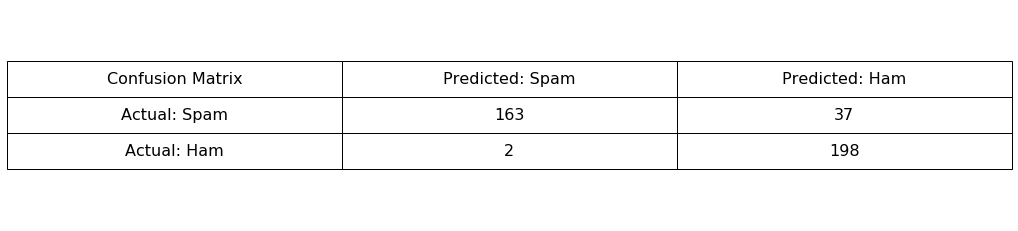

In [34]:
# result for  classifying Spam testset by using Bayes  
SVTestBayes = BayesList(SVTest,{})
# result for  classifying Ham testset by using Bayes  
HVTestBayes = BayesList(HVTest,{})
# print(SVTestBayes)
# print(HVTestBayes)
temp_ac, temp_pre, temp_recall, temp_f1 = confusion_matrix(SVTestBayes, HVTestBayes)
acc.append(temp_ac)
pre.append(temp_pre)
recall.append(temp_recall)
f1.append(temp_f1)

## 5.2) KNN cosine on all words

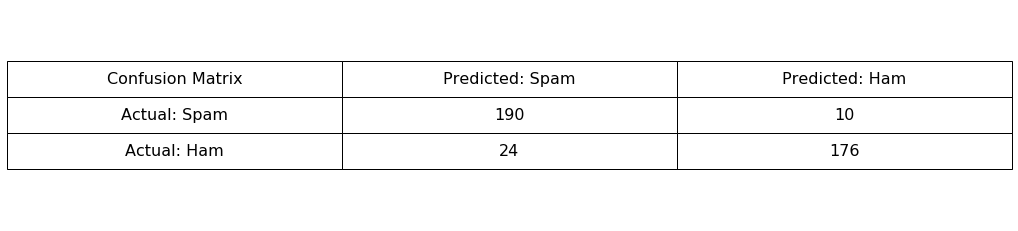

In [35]:
# result for  classifying Spam testset by using KNN cosine and using All words  
SVTestKNNcosine = KNNList(SVTest, 0 , 3 , {})
# result for  classifying Ham testset by using KNN cosine and using All words  
HVTestKNNcosine = KNNList(HVTest, 0 , 3 , {})
# print(SVTestKNNcosine)
# print(HVTestKNNcosine)
temp_ac, temp_pre, temp_recall, temp_f1 = confusion_matrix(SVTestKNNcosine, HVTestKNNcosine)
acc.append(temp_ac)
pre.append(temp_pre)
recall.append(temp_recall)
f1.append(temp_f1)

## 5.3) KNN tf-idf on all words

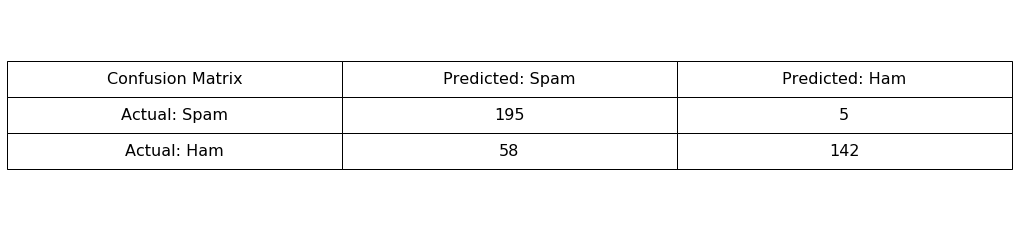

In [36]:
# result for  classifying Spam testset by using KNN tf-idf and using All words  
SVTestKNNtfIdf = KNNList(SVTest, 1 , 3 , {})
# result for  classifying Ham testset by using KNN tf-idf and using All words  
HVTestKNNtfIdf = KNNList(HVTest, 1 , 3 , {})
# print(SVTestKNNtfIdf)
# print(HVTestKNNtfIdf)
temp_ac, temp_pre, temp_recall, temp_f1 = confusion_matrix(SVTestKNNtfIdf, HVTestKNNtfIdf)
acc.append(temp_ac)
pre.append(temp_pre)
recall.append(temp_recall)
f1.append(temp_f1)

## 5.4)  KNN cosine on important words

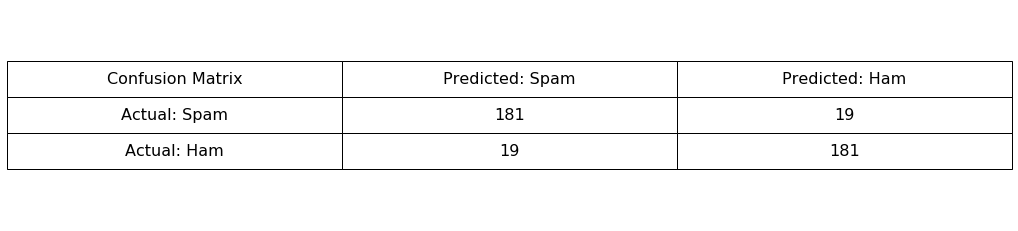

In [37]:
# result for classifying Spam testset by using KNN cosine and selected (important) words 
SVTestKNNCosineSelected = KNNList(SVTest, 0 , 3 , DFAS)
# result for classifying Ham testset by using KNN cosine and selected (important) words 
HVTestKNNCosineSelected = KNNList(HVTest, 0 , 3 , DFA)
# print(SVTestKNNCosineSelected)
# print(HVTestKNNCosineSelected)
temp_ac, temp_pre, temp_recall, temp_f1 = confusion_matrix(SVTestKNNCosineSelected, HVTestKNNCosineSelected)
acc.append(temp_ac)
pre.append(temp_pre)
recall.append(temp_recall)
f1.append(temp_f1)

## 5.5) KNN tf-idf on important words

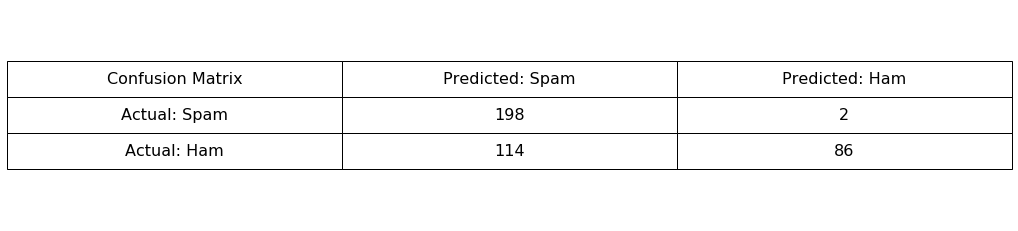

In [38]:
# result for  classifying Spam testset by using KNN tf-idf and selected (important) words 
SVTestKNNtfIdfSelected = KNNList(SVTest, 1 , 3 , DFAS)
# result for  classifying Ham testset by using KNN tf-idf and selected (important) words 
HVTestKNNtfIdfSelected = KNNList(HVTest, 1 , 3 , DFA)
# print(SVTestKNNtfIdfSelected)
# print(HVTestKNNtfIdfSelected)
temp_ac, temp_pre, temp_recall, temp_f1 = confusion_matrix(SVTestKNNtfIdfSelected, HVTestKNNtfIdfSelected)
acc.append(temp_ac)
pre.append(temp_pre)
recall.append(temp_recall)
f1.append(temp_f1)

## 5.6) Discussion

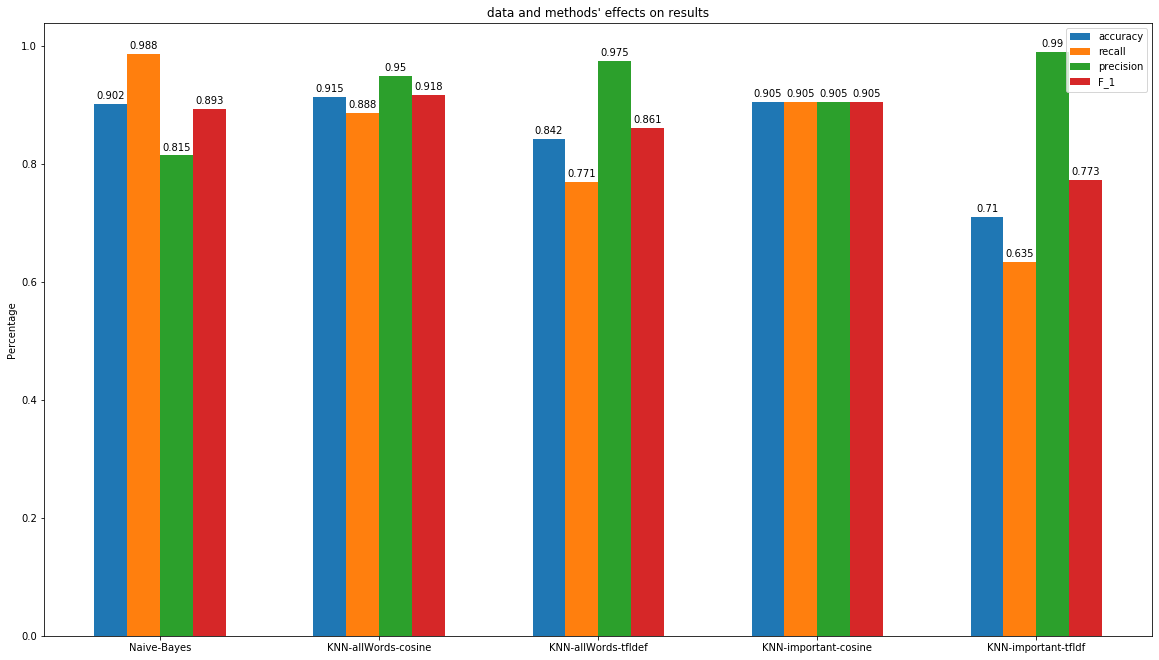

In [41]:
labels = ['Naive-Bayes', 'KNN-allWords-cosine', 'KNN-allWords-tfIdef', 'KNN-important-cosine', 'KNN-important-tfIdf']
# accuracy = [20, 34, 30, 35, 27]
# recall = [25, 32, 34, 20, 25]
# precision = [20, 34, 30, 35, 27]
# F_1 = [25, 32, 34, 20, 25]


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, acc, width, label='accuracy')
rects2 = ax.bar(x - width/2, recall, width, label='recall')
rects3 = ax.bar(x + width/2, pre, width, label='precision')
rects4 = ax.bar(x + 3*width/2, f1, width, label='F_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('data and methods\' effects on results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

plt.show()